# Blackjack

In this notebook, we implement the Blackjack game from Example 5.3 of Sutton and Barto's Reinforcement Learning book. The objective in Blackjack is to maximize the sum of card values without going over 21, with face cards valued at ten and Aces as either 1 or 11. We will utilize the Monte Carlo Control (for ε-soft policies) method to estimate state-action values and optimal policy. 

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from blackjack_mc_control_epsilon_soft import Blackjack

## Run Simulation

In [2]:
%%time
blackjack = Blackjack(epsilon=0.03)

state_action_function, policy = blackjack.on_policy_first_visit_mc(50000000)
state_value_function = blackjack.get_state_value_function()

CPU times: user 1h 7min 31s, sys: 1.39 s, total: 1h 7min 32s
Wall time: 1h 7min 38s


# Plot optimal policy and state-value function

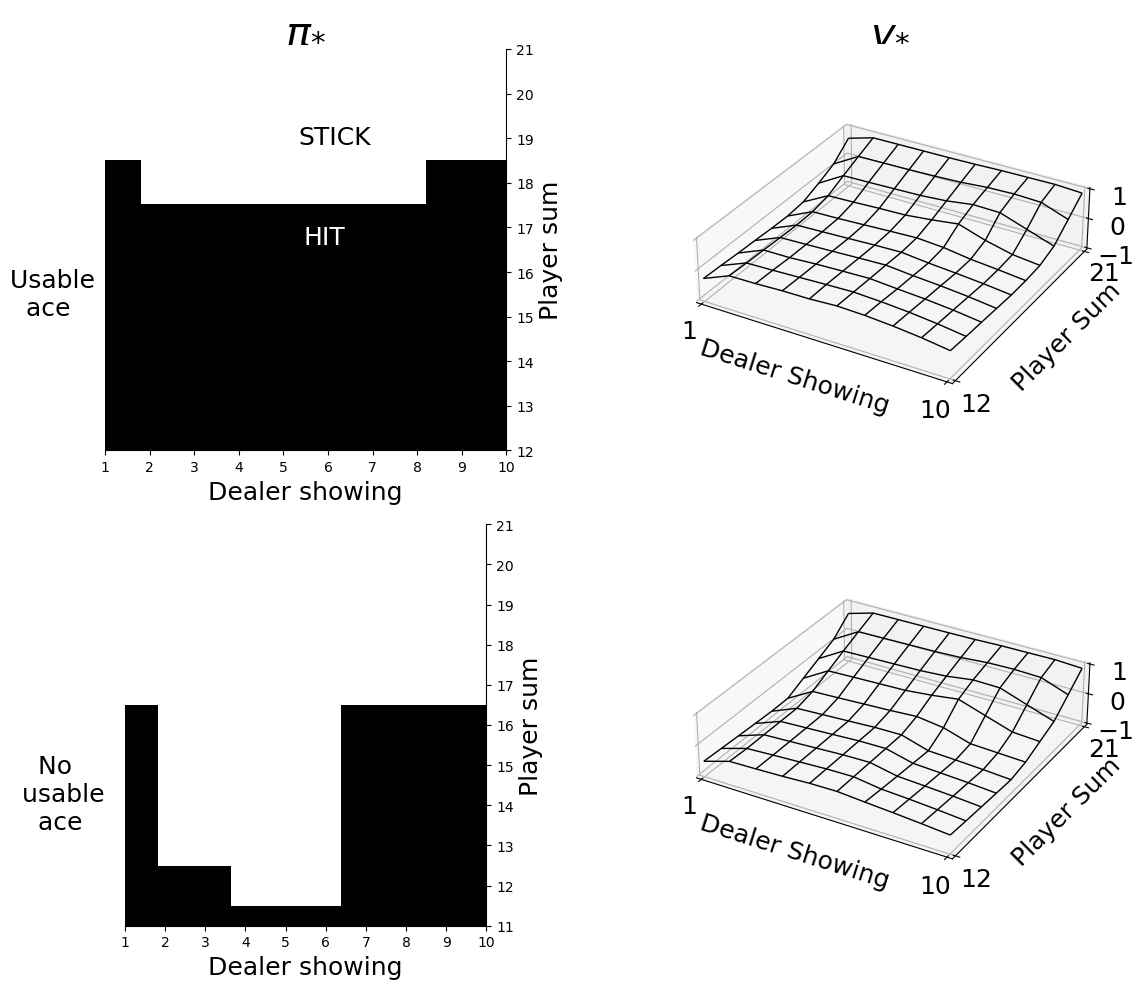

In [3]:
fig = plt.figure(figsize=(12, 10))

fig.text(0.01, 0.7, 'Usable \n  ace', va='center', rotation='horizontal', fontsize=18)
fig.text(0.02, 0.2, '  No\nusable \n  ace', va='center', rotation='horizontal', fontsize=18)
fig.text(0.25, 0.85, 'STICK', c="k", rotation='horizontal', fontsize=18)
fig.text(0.255, 0.75, 'HIT', c="w", rotation='horizontal', fontsize=18)

for i, usable_ace in enumerate([1, 0]):
    ax1 = fig.add_subplot(2, 2, i * 2 + 1)
    
    ax1.set_xlim([1, 10])
    ax1.set_ylim([11 + usable_ace, 21])
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.set_xticks(np.arange(1, 11, 1))
    ax1.set_yticks(np.arange(11 + usable_ace, 22, 1))
    ax1.yaxis.set_ticks_position('right')
    ax1.set_xlabel('Dealer showing', fontsize=18)
    ax1.set_ylabel('Player sum', fontsize=18)
    ax1.yaxis.set_label_position("right")

    if not i:
        ax1.set_title("$\pi_{*}$", fontsize=30)
    
    ax1.imshow(policy[:, :, usable_ace], cmap='gray', origin='lower', extent=(0, 10, -0.5, 21.5))
    
    ax2 = fig.add_subplot(2, 2, i * 2 + 2, projection='3d')
    
    X = np.arange(12, 22, 1)
    Y = np.arange(1, 11, 1)
    X, Y = np.meshgrid(X, Y)
    Z = state_value_function[X, Y, usable_ace]
    ax2.plot_wireframe(Y, X, Z, color='black', linewidth=1)
    ax2.set_xlabel('Dealer Showing', fontsize=18)
    ax2.set_ylabel('Player Sum', fontsize=18)
    ax2.set_xlim([1, 10])
    ax2.set_xticks([1, 10])
    ax2.set_ylim([12, 21])
    ax2.set_yticks([12, 21])
    ax2.set_zlim(-1, 1)
    ax2.set_zticks([-1, 0, 1])
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax2.set_box_aspect([1, 1 , 0.25])
    
    if not i:
        ax2.set_title("$v_{*}$", fontsize=30)
    
plt.tight_layout()
plt.show()
